<a href="https://colab.research.google.com/github/Vakhranev/Compling/blob/master/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16534 (delta 12), reused 17 (delta 5), pack-reused 16497
Receiving objects: 100% (16534/16534), 17.17 MiB | 22.51 MiB/s, done.
Resolving deltas: 100% (11555/11555), done.


In [4]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [6]:
cd build

/content/bigartm/build


In [9]:
!cmake ..

-- Build type: Release
-- Boost version: 1.65.1
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--   thread
--   program_options
--   date_time
--   filesystem
--   iostreams
--   system
--   chrono
--   timer
--   atomic
--   regex
CMake Warning (dev) at 3rdparty/protobuf-3.0.0/cmake/install.cmake:41 (message):
  The file
  "/content/bigartm/3rdparty/protobuf-3.0.0/src/google/protobuf/repeated_field_reflection.h"
  is listed in
  "/content/bigartm/3rdparty/protobuf-3.0.0/cmake/cmake/extract_includes.bat.in"
  but there not exists.  The file will not be installed.
Call Stack (most recent call first):
  3rdparty/protobuf-3.0.0/cmake/CMakeLists.txt:159 (include)
This warning is for project developers.  Use -Wno-dev to suppress it.

-- Configuring done
-- Generating done
-- Build files have been written to: /content/bigartm/build


In [10]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [11]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [12]:
cd ../..

/content


In [13]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 7.1MB 7.2MB/s 
     |████████████████████████████████| 256kB 39.8MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=782528 sha256=61e91353f7222053e62eaaf8e82216b790a79bb6a0b39e1cdf10db140933c01c
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


In [14]:
import artm
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [15]:
nltk.download('punkt');
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stops = set(stopwords.words('russian')) | {'gt',}
def cutter(text):
     return re.sub(r'(^|\b)[А-Яа-я]{1,3}(\b|$)', '', text)

def remove_tags(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[A-Za-z0-9.—«_»]+', '', text)
    return cutter(text)

def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word]
    
    return words

In [17]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-14 14:34:04--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-14 14:34:04--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  35.7MB/s    in 0.5s    

2020-02-14 14:34:05 (35.7 MB/s) - ‘habr_texts.t

In [18]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
texts = open('habr_texts.txt').read().splitlines()
texts = opt_normalize([(tokenize(remove_tags(text.lower()))) for text in texts], 30000)

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3, 
                           common_terms=set(stopwords.words('russian')))
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[texts]

In [0]:
ngrammed_habr_texts[1]

['введение',
 'выбор',
 'решение',
 'рано_поздно',
 'наступать_момент',
 'жизнь',
 'любой',
 'сообщество',
 'форум',
 'привлечение',
 'удержание',
 'человек',
 'возникать',
 'острый_необходимость',
 'использование',
 'новое',
 'инструментарий',
 'весьма',
 'эффективный',
 'инструмент',
 'являться',
 'крыться',
 'модный',
 'ныне',
 'слово',
 'использование',
 'характерный',
 'приём',
 'подход',
 'процесс',
 'участник_сообщество',
 'форум',
 'создание',
 'активный',
 'мощный',
 'информационный',
 'поль',
 'вокруг',
 'наш',
 'продукт',
 'использовать',
 'наш',
 'компания',
 'движок',
 'настоящее_время',
 'являться',
 'наиболее_популярный',
 'быстро',
 'движок',
 'умолчание',
 'иметь',
 'встроить',
 'система',
 'трофей',
 'основать',
 'собственный',
 'весьма_ограниченный',
 'система',
 'критерий',
 'система',
 'создание',
 'трофей',
 'также',
 'иметь',
 'ограниченный',
 'функционал',
 'например',
 'возможность',
 'создавать',
 'трофей',
 'графический',
 'возможность',
 'создавать',
 'скрыт

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3, 
                           common_terms=stops) 
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[texts]

In [24]:
ngrammed_habr_texts[1]

['введение',
 'выбор',
 'решение',
 'рано_поздно',
 'наступать_момент',
 'жизнь',
 'любой',
 'сообщество',
 'форум',
 'привлечение',
 'удержание',
 'человек',
 'возникать',
 'острый_необходимость',
 'использование',
 'новое',
 'инструментарий',
 'весьма',
 'эффективный',
 'инструмент',
 'являться',
 'крыться',
 'модный',
 'ныне',
 'слово',
 'использование',
 'характерный',
 'приём',
 'подход',
 'процесс',
 'участник_сообщество',
 'форум',
 'создание',
 'активный',
 'мощный',
 'информационный',
 'поль',
 'вокруг',
 'наш',
 'продукт',
 'использовать',
 'наш',
 'компания',
 'движок',
 'настоящее_время',
 'являться',
 'наиболее_популярный',
 'быстро',
 'движок',
 'умолчание',
 'иметь',
 'встроить',
 'система',
 'трофей',
 'основать',
 'собственный',
 'весьма_ограниченный',
 'система',
 'критерий',
 'система',
 'создание',
 'трофей',
 'также',
 'иметь',
 'ограниченный',
 'функционал',
 'например',
 'возможность',
 'создавать',
 'трофей',
 'графический',
 'возможность',
 'создавать',
 'скрыт

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  
                                        data_format='vowpal_wabbit', 
                                        target_folder='batches', 
                                       batch_size=1000)

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', 
                                        data_format='batches')

In [0]:
dictionary = artm.Dictionary()

In [30]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=c56158fe-52f2-490d-a442-a6d8d202d648, num_entries=8153)

In [0]:
dictionary.save_text('dict.txt')

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=dictionary, )

In [0]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10))

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 887.207 (ARTM)


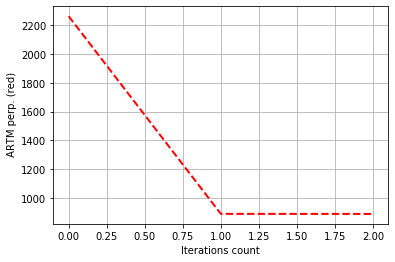

In [36]:
print_measures(model_artm)

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [41]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: 
        continue

topic_0: 
рюкзак
поезд
потихоньку
забавно
кстати
прям
народ
рука
капитан
вооружение
---------
topic_1: 
устройство
защита
атака
–
смартфон
оборудование
компьютер
ноутбук
компания
хакер
---------
topic_2: 
человек
курс
слово
социальный
дело
сказать
вопрос
лицо
говорить
книга
---------
topic_3: 
результат
процесс
решение
количество
являться
задача
связь
номер
необходимый
база
---------
topic_4: 
задача
процесс
инструкция
результат
архитектура
программа
количество
быстрый
использование
процессор
---------
topic_5: 
–
позволять
устройство
процесс
являться
разный
программа
вид
простой
некоторый
---------
topic_6: 
модуль
использование
пользователь
–
простой
необходимый
функция
статья
создать
ваш
---------
topic_7: 
резервный
копия
машина
виртуальный
сервер
восстановление
кластер
диск
копирование
хранение
---------
topic_8: 
доклад
конференция
участник
выступление
тема
рассказать
презентация
мероприятие
спикер
видео
---------
topic_9: 
программа
язык
слово
часть
некоторый
найти
высказывание


In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*1))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.920 ARTM)
Sparsity Theta: 0.207 (ARTM)
Kernel contrast: 0.365 (ARTM)
Kernel purity: 0.465 (ARTM)
Perplexity: 461.516 (ARTM)


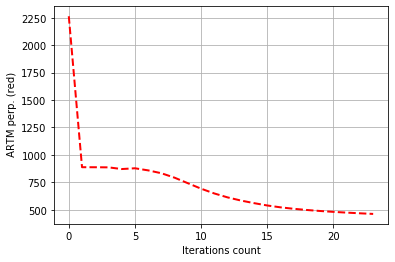

In [43]:
print_measures(model_artm)

In [44]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
поезд
дверь
рюкзак
капитан
кстати
забавно
потихоньку
ящик
золотой
пора
---------
topic_1: 
защита
атака
компьютер
угроза
хакер
защитить
жертва
обнаружение
информационный
безопасность
---------
topic_2: 
человек
социальный
лицо
чувство
личность
мнение
восприятие
счастие
страх
жизнь
---------
topic_3: 
оценка
номер
процесс
результат
количество
необходимый
текущий
база
решение
определённый
---------
topic_4: 
архитектура
результат
быстрый
процесс
инструкция
значительный
современный
количество
общий
значительно
---------
topic_5: 
позволять
весьма
подобный
вид
являться
дополнительный
наличие
кроме
вариант
качество
---------
topic_6: 
добавить
создать
любой
простой
необходимый
статья
создание
стандартный
название
использование
---------
topic_7: 
диск
копия
хранение
резервный
кластер
хранилище
восстановление
копирование
машина
хост
---------
topic_8: 
конференция
доклад
презентация
тема
рассказать
выступление
мероприятие
интересный
александр
спикер
---------
topic_9: 
глава
програ

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*10))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.983 ARTM)
Sparsity Theta: 0.427 (ARTM)
Kernel contrast: 0.604 (ARTM)
Kernel purity: 0.817 (ARTM)
Perplexity: 432.002 (ARTM)


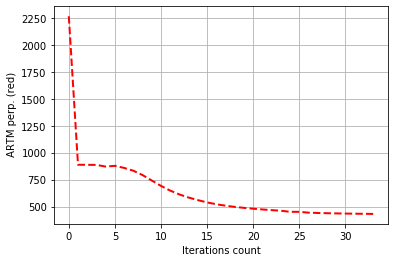

In [46]:
print_measures(model_artm)

In [47]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
дверь
золотой
кстати
поезд
открывать
черта
кат
превращаться
обстановка
словно
---------
topic_1: 
защита
атака
злоумышленник
угроза
защитить
безопасность
обнаружение
жертва
хакер
защищать
---------
topic_2: 
человек
социальный
мнение
личность
информация
чувство
эмоция
отношение
считать
сильный
---------
topic_3: 
оценка
номер
количество
внутренний
текущий
формирование
результат
учёт
определённый
процесс
---------
topic_4: 
архитектура
результат
значительно
значительный
быстрый
процесс
снизить
количество
увеличение
поскольку
---------
topic_5: 
подобный
наличие
какой-либо
весьма
вполне
кроме
позволять
дополнительный
вид
непосредственно
---------
topic_6: 
создать
добавить
название
любой
стандартный
создание
внутри
необходимый
заменить
забывать
---------
topic_7: 
диск
хранение
копия
резервный
кластер
хранилище
восстановление
копирование
хост
объём
---------
topic_8: 
конференция
доклад
презентация
рассказать
выступление
москва
тема
мероприятие
интересный
выступать
---------
to

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*10))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*5))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.993 ARTM)
Sparsity Theta: 0.798 (ARTM)
Kernel contrast: 0.547 (ARTM)
Kernel purity: 0.975 (ARTM)
Perplexity: 539.075 (ARTM)


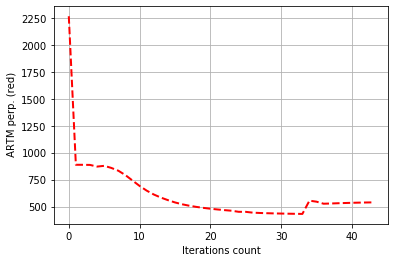

In [49]:
print_measures(model_artm)

In [50]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
результат
задача
решение
последний
количество
образ
человек
проект
процесс
хотеть
---------
topic_1: 
атака
защита
безопасность
злоумышленник
вредоносный
угроза
защитить
информационный
хакер
жертва
---------
topic_2: 
человек
социальный
эмоция
общество
чувство
восприятие
личность
мнение
мышление
информация
---------
topic_3: 
номер
оценка
текущий
внутренний
учёт
количество
соответствие
формирование
результат
определённый
---------
topic_4: 
результат
архитектура
увеличение
значительно
значительный
количество
уменьшить
уменьшение
---------
topic_5: 
дополнительный
качество
вид
подобный
наличие
вполне
отметить
какой-либо
необходимость
весьма
---------
topic_6: 
создать
создание
добавить
название
необходимый
внутри
стандартный
изменить
любой
добавлять
---------
topic_7: 
диск
хранение
резервный
кластер
хранилище
копия
хост
восстановление
копирование
бэкап
---------
topic_8: 
доклад
конференция
слайд
презентация
выступление
москва
мероприятие
рассказать
тема
спикер
---------
topi

In [0]:
f = open('ng_habr_texts.vw', 'w')

for i, text in enumerate(ngrammed_habr_texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='ng_habr_texts.vw',
                                        data_format='vowpal_wabbit',
                                        target_folder='ng_batches',
                                       batch_size=1000)

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='ng_batches',
                                        data_format='batches')

In [0]:
ng_dictionary = artm.Dictionary()

In [56]:
ng_dictionary.gather(data_path='ng_batches')
ng_dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=091a9075-bcf5-4566-8773-d2a7e6e658fc, num_entries=11119)

In [0]:
ng_dictionary.save_text('ng_dict.txt')

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(200)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=0.25, 
                                            class_ids=['@default_class'],
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=0.15, 
                                            topic_names=['topic_{}'.format(i) for i in range(0, 200)])
                                    ]
                        )

In [0]:
model_artm.initialize(dictionary=ng_dictionary, )

In [0]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=ng_dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1))
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
model_artm.num_document_passes = 2
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 936.991 (ARTM)


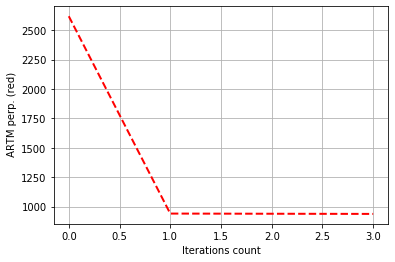

In [63]:
print_measures(model_artm)

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 200)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 200)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.794 ARTM)
Sparsity Theta: 0.117 (ARTM)
Kernel contrast: 0.268 (ARTM)
Kernel purity: 0.237 (ARTM)
Perplexity: 562.825 (ARTM)


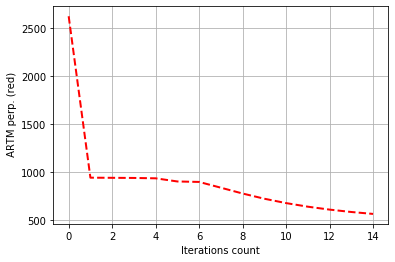

In [67]:
print_measures(model_artm)

In [68]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
просить_прощение
предсказуемый
адаптивный
прошлый_неделя
проблема
модульность
прям
здравый_смысл
довестись
забавно
---------
topic_1: 
год
ноутбук
компьютер
миллион
устройство
доллар
компания
сегодня
прошлое_год
последний
---------
topic_2: 
курс
человек
лекция
ручка
слово
чувство
лицо
занятие
книга
экзамен
---------
topic_3: 
результат
являться
процесс
оценка
решение
задача
проблема
анализ
поисковый_система
необходимый
---------
topic_4: 
процессор
чип
компьютер
кристалл
архитектура
результат
процесс
современный
программа
быстрый
---------
topic_5: 
–
позволять
мотор
разный
являться
вид
процесс
вариант
размер
простой
---------
topic_6: 
модуль
добавить
необходимый
контроллер
использование
функция
создать
использоваться
создание
любой
---------
topic_7: 
восстановление
виртуальный_машина
резервный_копия
диск
резервный_копирование
сервер
копия
нагрузка
бэкап
скорость
---------
topic_8: 
участник
конференция
доклад
мероприятие
рассказать
тема
презентация
выступление
слайд
встре

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*1))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.941 ARTM)
Sparsity Theta: 0.247 (ARTM)
Kernel contrast: 0.370 (ARTM)
Kernel purity: 0.522 (ARTM)
Perplexity: 472.171 (ARTM)


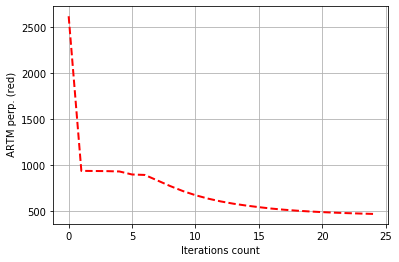

In [70]:
print_measures(model_artm)

In [71]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
просить_прощение
спешить
предсказуемый
прям
беспокоиться
пилить
прошлый_неделя
модульность
обратить
водиться
---------
topic_1: 
год
миллион
последний
появиться
прошлое_год
сегодня
выпустить
конец_год
объявить
опубликовать
---------
topic_2: 
курс
лекция
студент
научиться
человек
занятие
знание
тренировка
знакомство
подготовка
---------
topic_3: 
результат
являться
процесс
оценка
информационный
право
исходить
необходимый
согласно
вид
---------
topic_4: 
процессор
архитектура
современный
чип
поколение
разработать
кристалл
вычислительный
новое
семейство
---------
topic_5: 
весьма
максимальный
позволять
размер
вариант
вид
наличие
мотор
вполне
разумеется
---------
topic_6: 
добавить
создать
необходимый
создание
название
использование
добавлять
обратить_внимание
стандартный
любой
---------
topic_7: 
диск
виртуальный_машина
восстановление
копия
резервный_копия
резервный_копирование
бэкап
создание
скорость
нагрузка
---------
topic_8: 
участник
конференция
доклад
мероприятие
презента

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*10))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.985 ARTM)
Sparsity Theta: 0.453 (ARTM)
Kernel contrast: 0.645 (ARTM)
Kernel purity: 0.836 (ARTM)
Perplexity: 457.367 (ARTM)


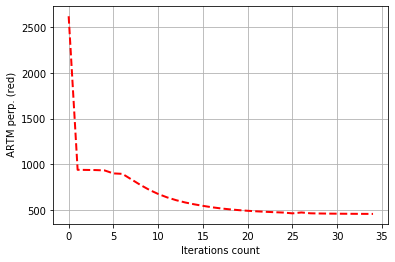

In [73]:
print_measures(model_artm)

In [74]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError:
        continue

topic_0: 
спешить
серьёзно
прочее
своеобразный
подобно
объединять
всякий_случай
целовать
временно
выглядеть_примерно
---------
topic_1: 
год
миллион
последний
появиться
начало
выпустить
прошлое_год
конец_год
сегодня
объявить
---------
topic_2: 
курс
научиться
лекция
изучать
подготовка
студент
практика
знание
основа
проходить
---------
topic_3: 
результат
являться
согласно
право
формирование
процесс
направить
информационный
исходить
необходимый
---------
topic_4: 
процессор
архитектура
современный
мощный
чип
поколение
вычислительный
специализировать
кристалл
разработать
---------
topic_5: 
наличие
вполне
весьма
максимальный
минимальный
разумеется
вид
отсутствовать
позволять
непосредственно
---------
topic_6: 
добавить
создать
добавлять
название
создание
необходимый
добавление
обратить_внимание
изменить
использование
---------
topic_7: 
диск
виртуальный_машина
копия
восстановление
резервный_копия
резервный_копирование
создание
бэкап
копирование
сбой
---------
topic_8: 
участник
конференц

Перплексия лучше всего снизилась на последней модели (до 457,37), поэтому, исходя из этого показателя, это лучшая модель. Я пробовал сначала обычные модели, потом модели с n-граммами, постоянно изменяя разрешенность тем и разреженность документов (в основном, увеличивая оба показателя). Перплексия последовательно снижалась, и на самой последней модели (с n-граммами) достигла лучшего результата. График показан выше.

Модель выдаёт достаточно неплохие темы, например:

12 тема (блокировка рекламы):
сайт
реклама
блокировка
блокировать
заблокировать
хостинг
запретить
рекламный
владелец
поисковый_система

22 тема (аудио):
звук
комната
помещение
наушник
динамик
искажение
усилитель
звуковой
качество
слух

45 тема (хранение данных):
ключ
хранить
удаление
удалить
формат
сохранять
редактор
храниться
каталог
содержимое